In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def start_corner_found(array, idx, threshold):
    start_corner_found = False
    gradient = np.gradient(array)
    current_slope = gradient[idx-1]              #Find_Slope(spectrum_power_array, time_array, idx)
    next_slope = gradient[idx]#Find_Slope(spectrum_power_array, time_array, idx+3)
    if((current_slope <= threshold) and (next_slope >= threshold)):
        start_corner_found = True
        # print("corner start information:\n - current slope:", current_slope,"next slope:", next_slope, "Slope threshold:", threshold)
    return start_corner_found

def end_corner_found(array, idx, threshold):
    end_corner_found = False
    gradient = np.gradient(array)
    current_slope = gradient[idx-1]              #Find_Slope(spectrum_power_array, time_array, idx)
    next_slope = gradient[idx]#Find_Slope(spectrum_power_array, time_array, idx+3)
    if((current_slope <= (-1)*threshold) and (next_slope >= (-1)*threshold)):
        end_corner_found = True
        # print("corner end information:\n - current slope:", current_slope,"next slope:", next_slope, "Slope threshold:", threshold)
    return end_corner_found

def find_square_period(array, threshold):
    # scan_bandwidth = 20 #[idx]
    #Scan the whole array using the functions
    square_found = False
    for start_corner_idx in range(len(array)):
        if start_corner_found(array, start_corner_idx, threshold):
            for end_corner_idx in range(start_corner_idx, len(array)):
                if end_corner_found(array, end_corner_idx, threshold):
                    print("Found at start:", start_corner_idx, ". End:", end_corner_idx)
                    square_found = True
                    break
                else:
                    continue
            if(square_found):
                break
            else:
                continue
    return start_corner_idx, (end_corner_idx+1) #+1 because the diff fuction looks +1 ahead

Found at start: 20 . End: 31
(20, 32)


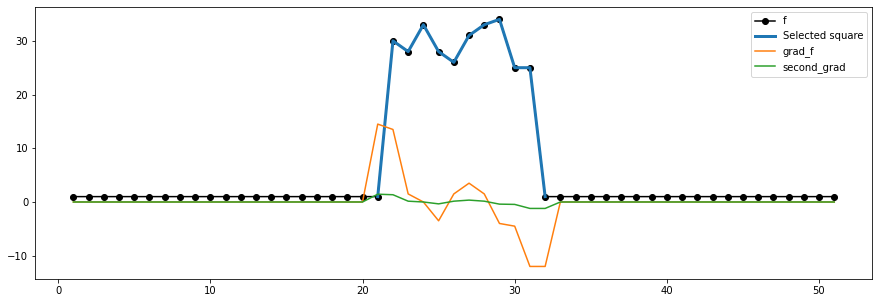

In [12]:
f_array = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,30,28,33,28,26,31,33,34,25,25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
t_array = np.array(range(1, len(f_array)+1))
grad_f = np.gradient(f_array)
# second_grad = np.gradient(grad_f)
second_grad = np.gradient(f_array, 10)

fig,axs = plt.subplots(1,1,figsize=(15,5))
square_interval = find_square_period(f_array, 12)

print(square_interval)
axs.plot(t_array, f_array,  '-ok', label = 'f') 
axs.plot(t_array[square_interval[0]: square_interval[1]], f_array[square_interval[0]: square_interval[1]], label = "Selected square", linewidth=3)
axs.plot(t_array, grad_f, label = "grad_f")
axs.plot(t_array, second_grad, label = "second_grad")
axs.legend()